<a href="https://colab.research.google.com/github/mateustabach/EntregasPUC/blob/main/MVP1_Mateus_Tabach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Mateus Maracaja Tabach

**Matrícula:** 4052025000370

**Dataset:** [Global Renewable Energy Production](https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy)



# Descrição do Problema

Considerando a importância do debate energético no contexto da mudança climática, é fundamental que acompanhemos a evolução das fontes renováveis de energia. Ao longo desse projeto, acompanharemos como está a evolução das matrizes energéticas renováveis de dez países do mundo de contextos bem diferentes em busca de tentar capturar tendências e realizar observações sobre como esse assunto se desenrolou ao longo do século XXI.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

1- A produção de energia solar e eólica aumentou de forma mais acelerada do que hidroelétrica.

2 - A diversificação da matriz (em vez da dependência em uma só fonte) está crescendo nos países mais desenvolvidos.

3 - É possível prever tendências de evolução e diversificação das fontes de energia renovável até 2030 com base nos dados históricos.

## Tipo de Problema

Inicialmente descritivo (análise exploratória). Depois supervisionado (previsão) com séries temporais (aprendizado supervisionado com regressão).

## Seleção de Dados

O dataset selecionado já está pronto para uso.

## Atributos do Dataset

O dataset Global Renewable Energy Production contém 240 amostras, com dez países tendo sua matriz energética renovável análisada. Possui sete atributos:

- Year (ano de análise)
- Country (país analisado)
- SolarEnergy (energia solar produzida)
- WindEnergy (energia eólica produzida)
- HydroEnergy (energia hidrelétrica)
- OtherRenewableEnergy (outras fontes renováveis)
- TotalRenewableEnergy (total consolidado de todas as fontes renováveis)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset escolhido.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


url = 'https://raw.githubusercontent.com/mateustabach/EntregasPUC/refs/heads/main/global_renewable_energy_production.csv'
df = pd.read_csv(url)

In [3]:
# primeiras linhas
df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset selecionado possui 240 instâncias (observações), com 24 instâncias para cada um dos dez países, uma por ano. As seis características de medição são de tipo numérico, sendo 5 float e "Year" é int, enquanto o atributo "Country" é categórico.

In [4]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())


Total de instâncias: 240

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB
None


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [5]:
# estatísticas descritivas básicas do dataset
df.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [6]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Year,2011.500000
SolarEnergy,528.523858
WindEnergy,857.133260
HydroEnergy,1076.581975
OtherRenewableEnergy,287.127554
TotalRenewableEnergy,2749.366647


/tmp/ipython-input-7-3811575917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-7-3811575917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-7-3811575917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-7-3811575917.py:13: FutureWarning: 

Passing `palette` without ass

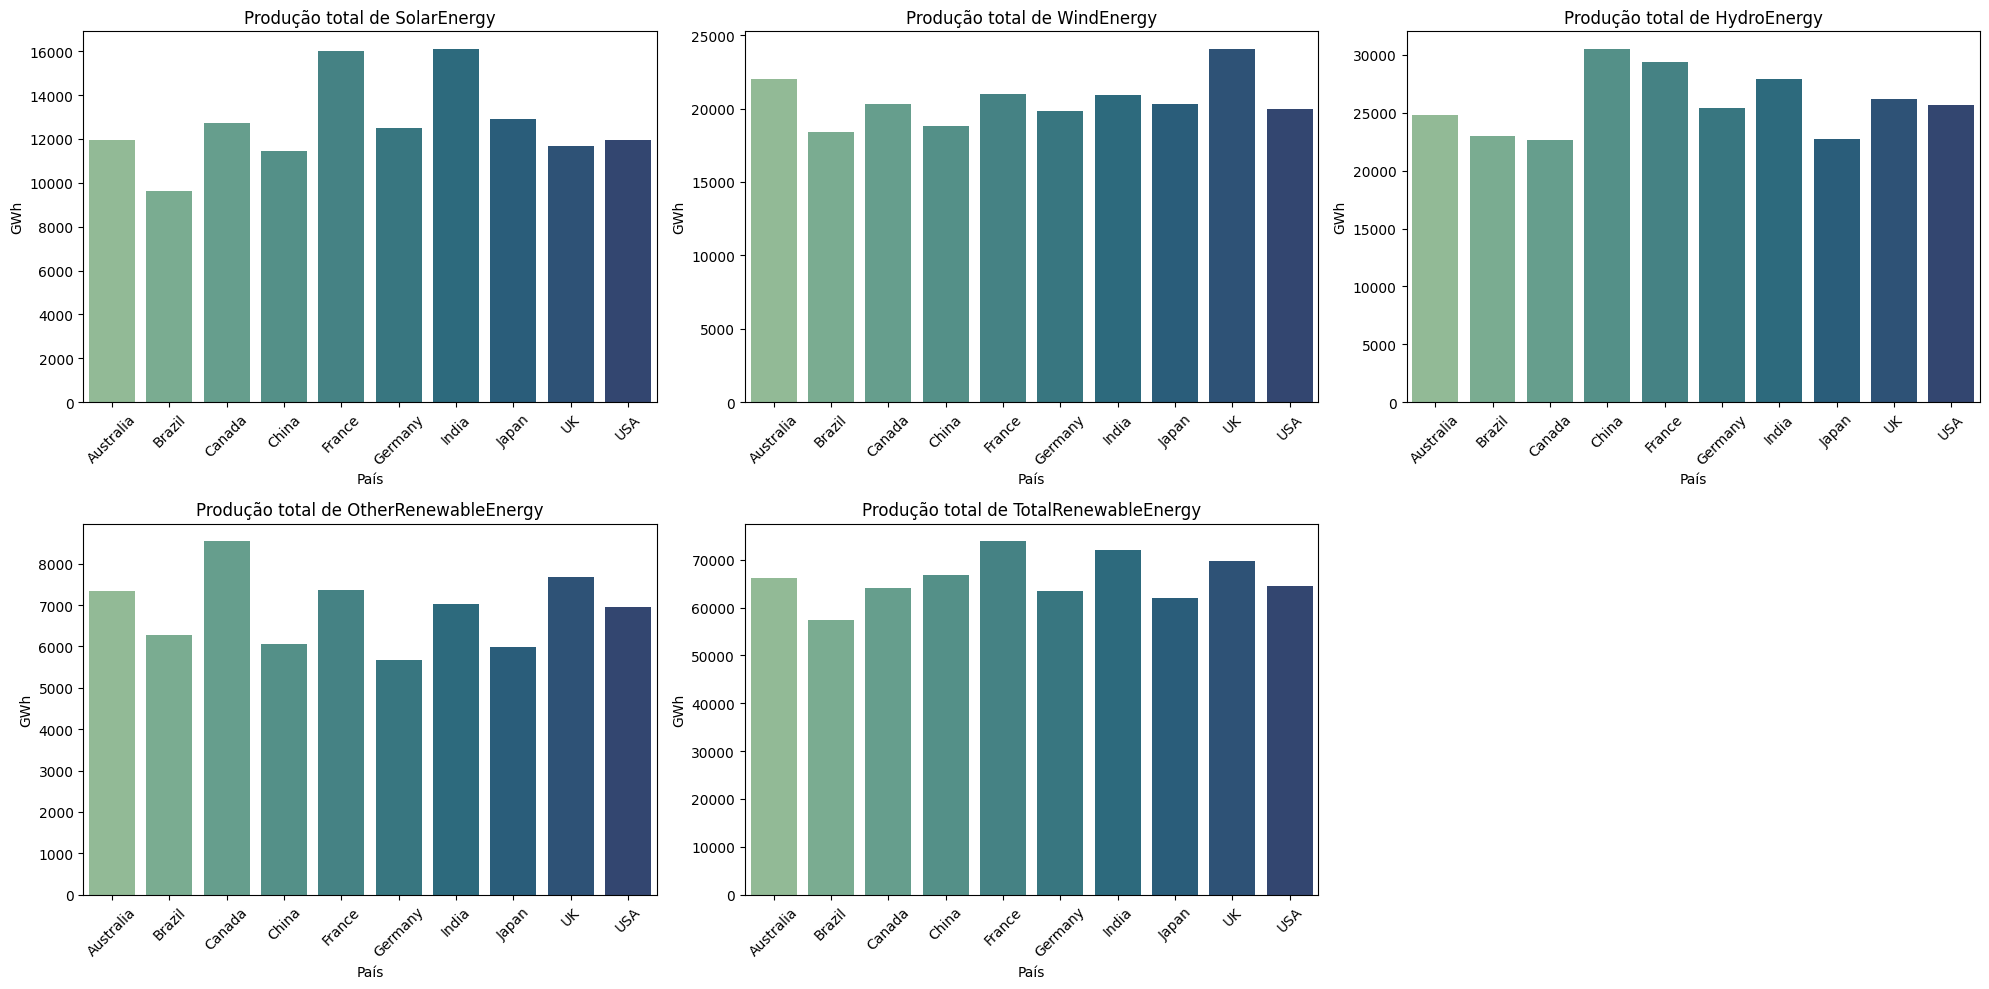

In [7]:
# lista de fontes renováveis analisadas e a soma das partes
energy_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# agrupar por país e somar a produção ao longo dos anos
df_grouped = df.groupby('Country')[energy_sources].sum().reset_index()

# criar uma grade de 2 linhas por 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# criar um gráfico para cada tipo de energia
for i, energy in enumerate(energy_sources):
    sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
    axes[i].set_title(f'Produção total de {energy}', fontsize=12)
    axes[i].set_ylabel('GWh')
    axes[i].set_xlabel('País')
    axes[i].tick_params(axis='x', rotation=45)

# remover o sexto gráfico (último slot da grade)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [8]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Year,6.936653
SolarEnergy,271.183089
WindEnergy,375.020314
HydroEnergy,499.981598
OtherRenewableEnergy,128.460792
TotalRenewableEnergy,695.126957


## Gráfico para mostrar o desvio padrão

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Year'),
  Text(1, 0, 'SolarEnergy'),
  Text(2, 0, 'WindEnergy'),
  Text(3, 0, 'HydroEnergy'),
  Text(4, 0, 'OtherRenewableEnergy'),
  Text(5, 0, 'TotalRenewableEnergy')])

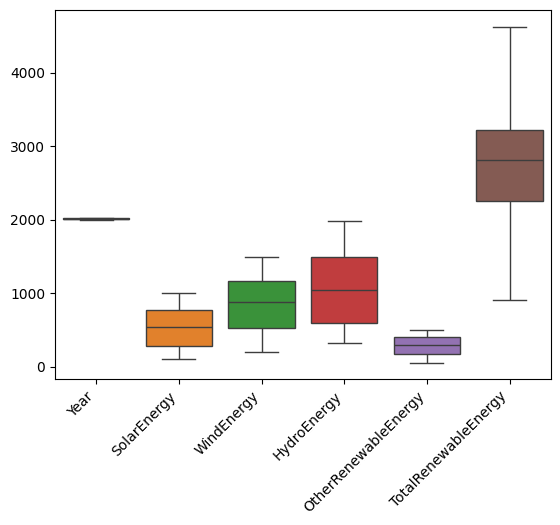

In [9]:
#o melhor gráfico para mostrar o desvio padrão é o boxplot. É compacto, robusto contra outliers e ótimo para comparações.
#nele podemos ver a variação dos dados claramente, a mediana, os pontos mais altos, baixos e outliers de cada atributo.
sns.boxplot(data = df)
plt.xticks(rotation = 45, ha='right')


O nosso boxplot mostra um desvio padrão alto para todas as fontes de energia e para a produção total. Isso expõe uma grande variância na geração, seja absoluta, ou por fonte.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

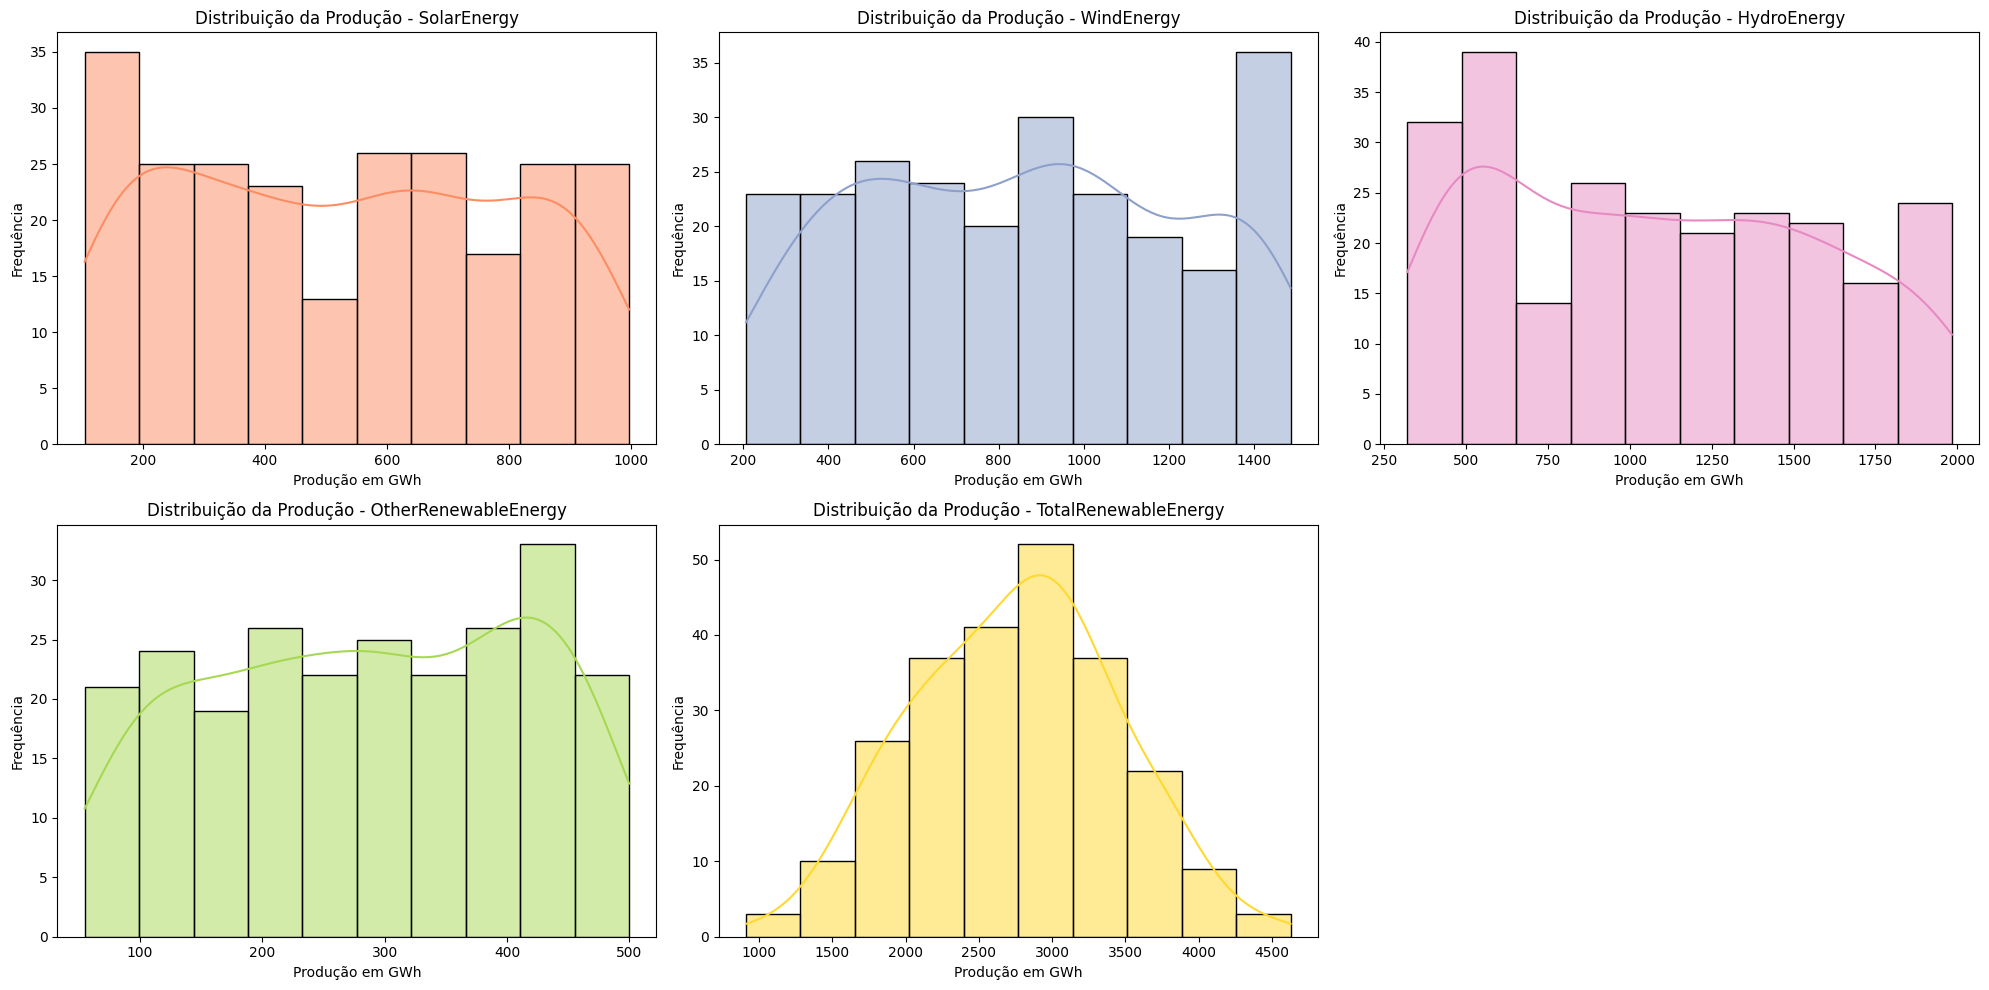

In [10]:
# lista de colunas de energia renovável
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# paleta de cores para os gráficos
paleta = sns.color_palette('Set2')

# tamanho total do painel
plt.figure(figsize=(20, 10))

# for loop pelos atributos de energia
for i, coluna in enumerate(colunas_energia, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=coluna, kde=True, bins=10, color=paleta[i % len(paleta)], edgecolor='black')
    plt.title(f'Distribuição da Produção - {coluna}', fontsize=12)
    plt.xlabel('Produção em GWh')
    plt.ylabel('Frequência')

# ajuste de layout
plt.tight_layout()
plt.show()

O conjunto de histogramas nos aponta para algumas conclusões. Energia solar tem seu pico de frequência próximo ao valor mais baixo de geração, Próximo a 200 GWh. Já energia eólica tem seu pico no valor mais alto, em torno de 1400 GWh. Hidrelétrica e outras também apontam picos esporádicos, Hidrelétrica entre os valores mais baixos apresentados e Outras entre os mais altos.

A grande conclusão está Total gerado. Claramente conseguimos ver que o total gerado por ano gira, em sua esmagadora maioria, entre 2000 e 3500 GWh.

## Boxplot

Para entender as diferenças de produção ano a ano, devemos olhar como se comportam os valores quando agrupadas por fonte energética. Isso nos permite comparar a média, mediana e desvio padrão de cada uma, além de visualizar suas distribuições por meio de boxplots.


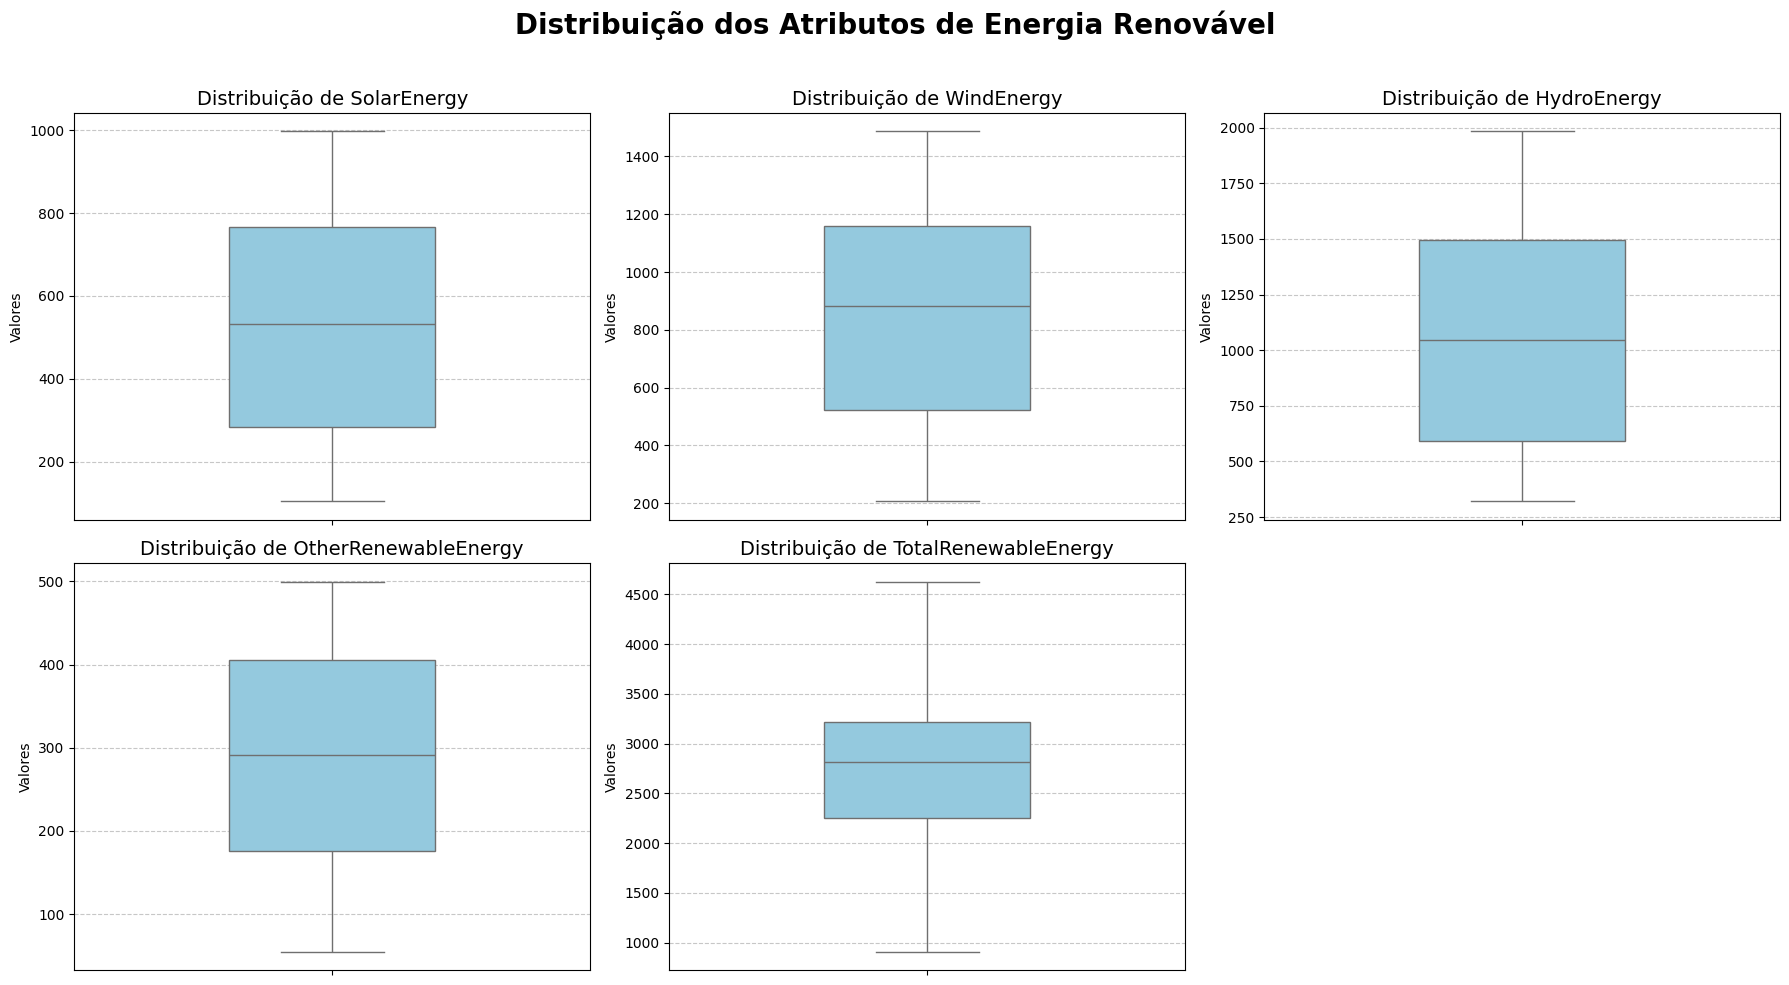

In [11]:
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']


colunas_existentes = [col for col in colunas_energia if col in df.columns]

# cria uma figura e uma grade de subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# adiciona um título geral para toda a figura
fig.suptitle('Distribuição dos Atributos de Energia Renovável', fontsize=20, fontweight='bold')


# loop para criar cada boxplot

# facilitando o loop com .flatten
axes_flat = axes.flatten()

for i, coluna in enumerate(colunas_energia):
    ax_atual = axes_flat[i] # pega o subplot (eixo) atual da lista

    # desenha um único boxplot no eixo atual
    # usamos y=coluna para mostrar a distribuição dos valores daquela coluna
    sns.boxplot(data=df, y=coluna, ax=ax_atual, color= 'skyblue', width=0.4)

    # personalizando cada subplot pela coluna que ele irá mosrtar
    ax_atual.set_title(f'Distribuição de {coluna}', fontsize=14)
    ax_atual.set_xlabel('') # Remove o rótulo do eixo X, pois não há categorias
    ax_atual.set_ylabel('Valores', fontsize=10)
    ax_atual.grid(axis='y', linestyle='--', alpha=0.7)

# ocultando o sexto gráfico
for i in range(len(colunas_energia), len(axes_flat)):
    axes_flat[i].axis('off')

# calibrando layout e usando plt.show para mostrar
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


O conjunto de boxplots nos dá a oportunidade de olharmos para todos os gráficos e analisarmos a variação em cada um. De cara, conseguimos ver que o Total produzido geralmente fica bem estável, independente do ano.

As 3 fontes renováveis que aparecem nominalmente tem uma variação enorme de produção a depender do ano acompanhado.

## Evolução de cada fonte energética por país e ano

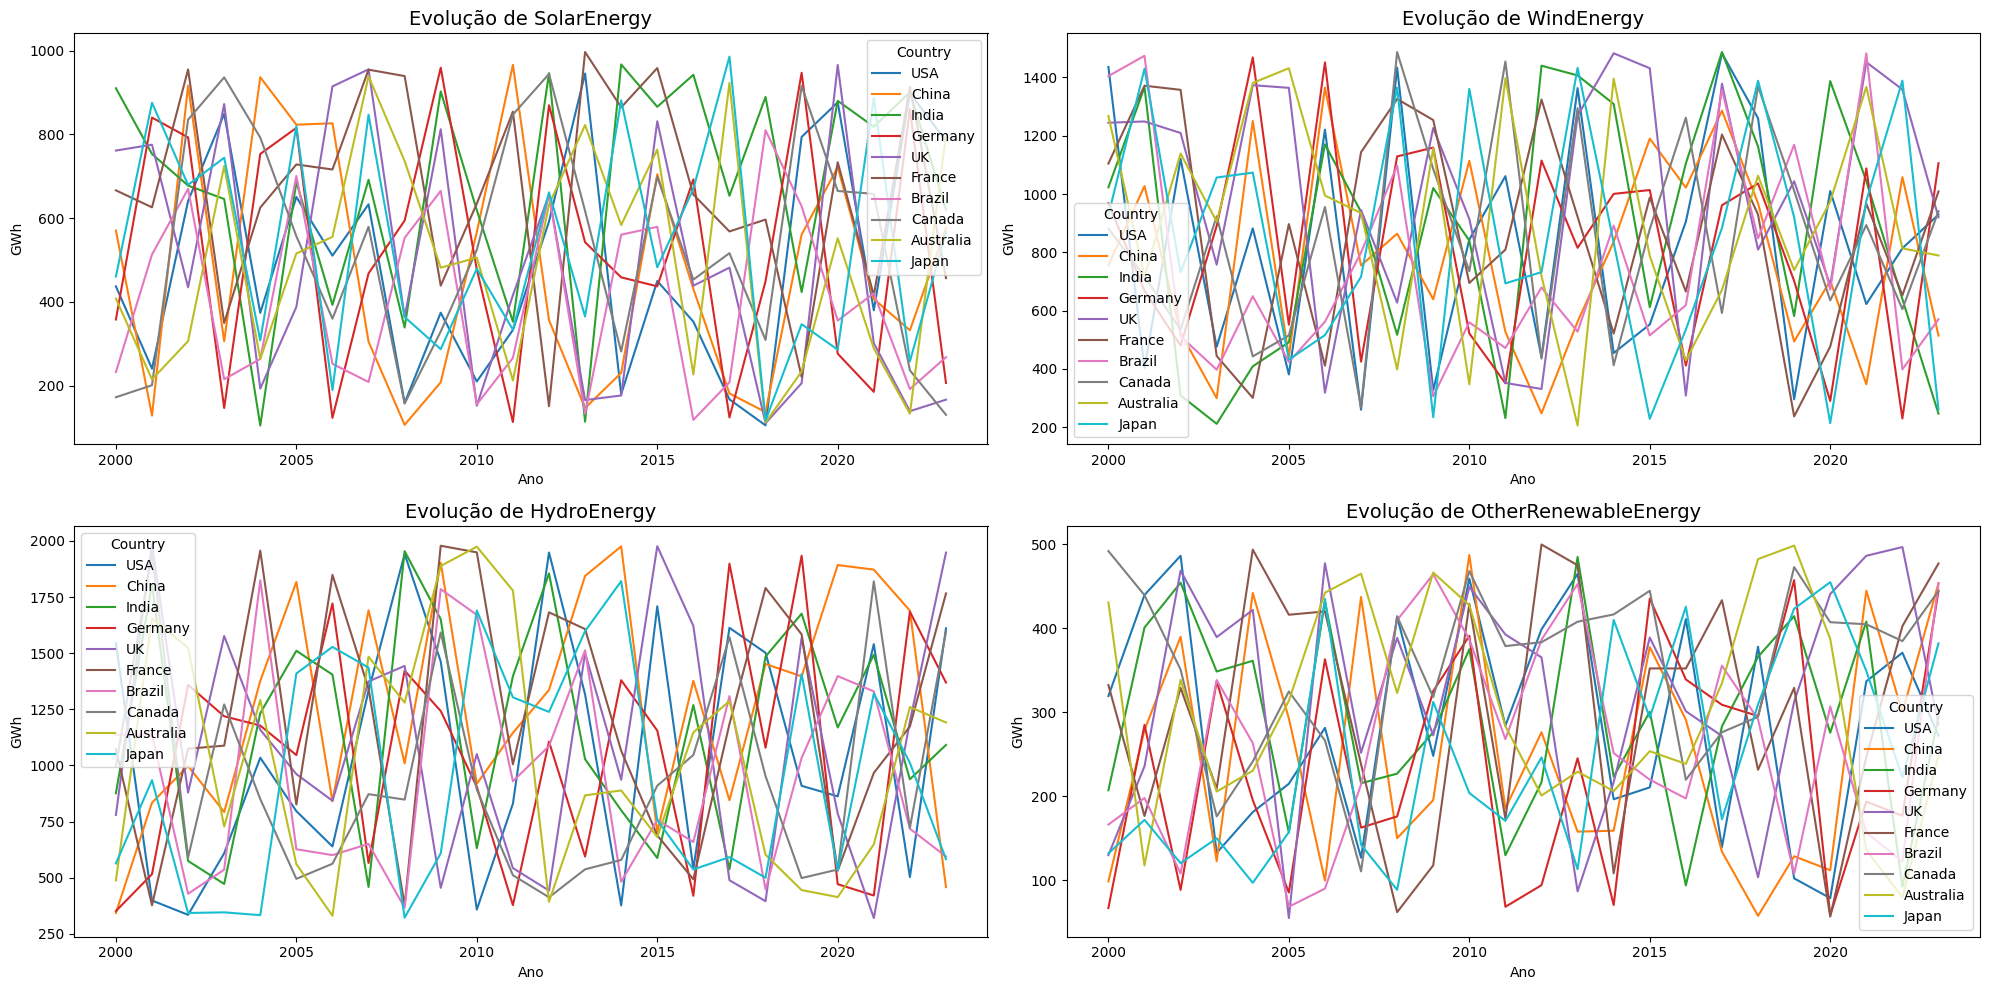

In [12]:
# fontes de energia
energy_types = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']
palette = sns.color_palette("tab10")

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(energy_types):
    sns.lineplot(data=df, x='Year', y=col, hue='Country', ax=axes[i], palette=palette)
    axes[i].set_title(f'Evolução de {col}', fontsize=14)
    axes[i].set_ylabel('GWh')
    axes[i].set_xlabel('Ano')

plt.tight_layout()
plt.show()

Para avaliar se houve crescimento em cada fonte por país, plotei gráficos que apresentassem a geração produzida por país, por ano. Isso resultou em quatro gráficos que apontam para bastante irregularidade nas matrizes energéticas dos países.

## Identificação de novas variáveis

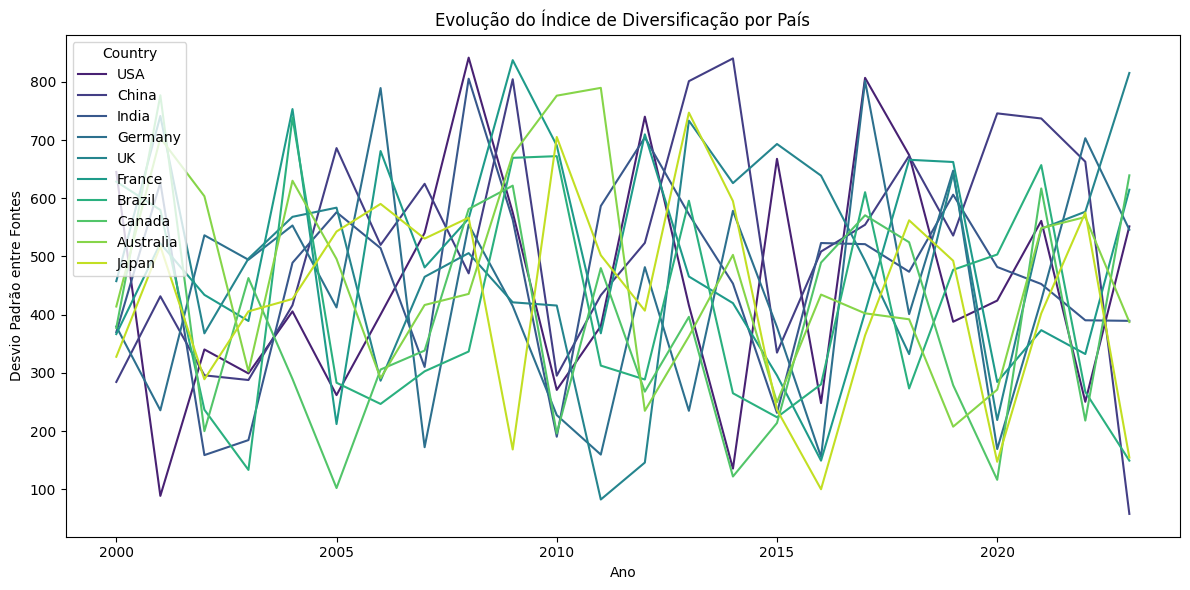

       Country  DiversificationIndex
23         USA            551.757297
47       China             57.637269
71       India            389.409405
95     Germany            546.095953
119         UK            815.383117
143     France            614.783844
167     Brazil            149.201651
191     Canada            639.480187
215  Australia            387.388962
239      Japan            154.483132


In [13]:
#criação do Índice de Diversificação por País
df['DiversificationIndex'] = df[energy_types].std(axis=1)

#elaboração do gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='DiversificationIndex', hue='Country', palette='viridis')
plt.title('Evolução do Índice de Diversificação por País')
plt.xlabel('Ano')
plt.ylabel('Desvio Padrão entre Fontes')
plt.tight_layout()
plt.show()

print(df[df['Year'] == 2023][['Country', 'DiversificationIndex']])


A tabela apresenta o Índice de Diversificação das fontes de energia renovável em 2023 para diferentes países. Esse índice foi calculado com base no desvio padrão entre as diferentes fontes (Solar, Eólica, Hidroelétrica e Outras Renováveis), e indica o grau de equilíbrio na distribuição da matriz renovável:

Índices mais altos refletem uma maior variabilidade entre as fontes utilizadas — ou seja, o país depende mais fortemente de uma ou duas fontes específicas.

Índices mais baixos indicam uma matriz mais equilibrada, com distribuição mais uniforme entre as diferentes fontes.

Principais conclusões:
Reino Unido (815), Canadá (639), França (614) e Alemanha (546) apresentam os maiores índices, sugerindo que suas matrizes são mais concentradas em algumas fontes específicas de energia renovável., como por exemplo, o gráfico acima de fonte por país, aponta para uma grande dependência do Reino Unido por energia hidrelétrica em 2023.

Por outro lado, China (57) e Brasil (149) apresentam índices significativamente menores, indicando uma maior diversificação nas fontes renováveis utilizadas.

Índia e Austrália têm valores intermediários (~387–389), o que sugere alguma concentração, mas com certa diversidade.

Os Estados Unidos, embora com alto valor (551), apresentam menor concentração que o Reino Unido, mas ainda indicam dependência de poucas fontes principais.

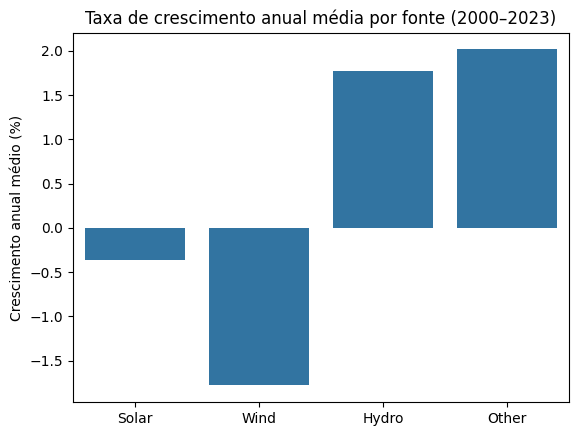

{'Solar': np.float64(-0.003658694585966793), 'Wind': np.float64(-0.01779680445162335), 'Hydro': np.float64(0.017702576949850446), 'Other': np.float64(0.020127509762330575)}


In [19]:
# Agrupando a produção por fonte
df_grouped = df.groupby("Year")[["SolarEnergy", "WindEnergy", "HydroEnergy", "OtherRenewableEnergy"]].sum()

# função para Taxa de crescimento anual composta (TCAC)
def tcac(start, end, years):
    return (end / start) ** (1 / years) - 1

# TCAC para 2000 a 2023
years = df_grouped.index.max() - df_grouped.index.min()
tcac_values = {
    "Solar": tcac(df_grouped["SolarEnergy"].iloc[0], df_grouped["SolarEnergy"].iloc[-1], years),
    "Wind": tcac(df_grouped["WindEnergy"].iloc[0], df_grouped["WindEnergy"].iloc[-1], years),
    "Hydro": tcac(df_grouped["HydroEnergy"].iloc[0], df_grouped["HydroEnergy"].iloc[-1], years),
    'Other': tcac(df_grouped["OtherRenewableEnergy"].iloc[0], df_grouped["OtherRenewableEnergy"].iloc[-1], years)
}

# plotando gráfico
sns.barplot(x=list(tcac_values.keys()), y=[v*100 for v in tcac_values.values()])
plt.ylabel("Crescimento anual médio (%)")
plt.title("Taxa de crescimento anual média por fonte (2000–2023)")
plt.show()

print(tcac_values)

Com o gráfico de TCAC, buscamos identificar o índice de crescimento das fontes de energia. Porém, o que descobrimos, foi que, nesses países, não houve um aumemnto considerável da geração de energia renovável.

/tmp/ipython-input-23-3904975457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-3904975457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-3904975457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-3904975457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


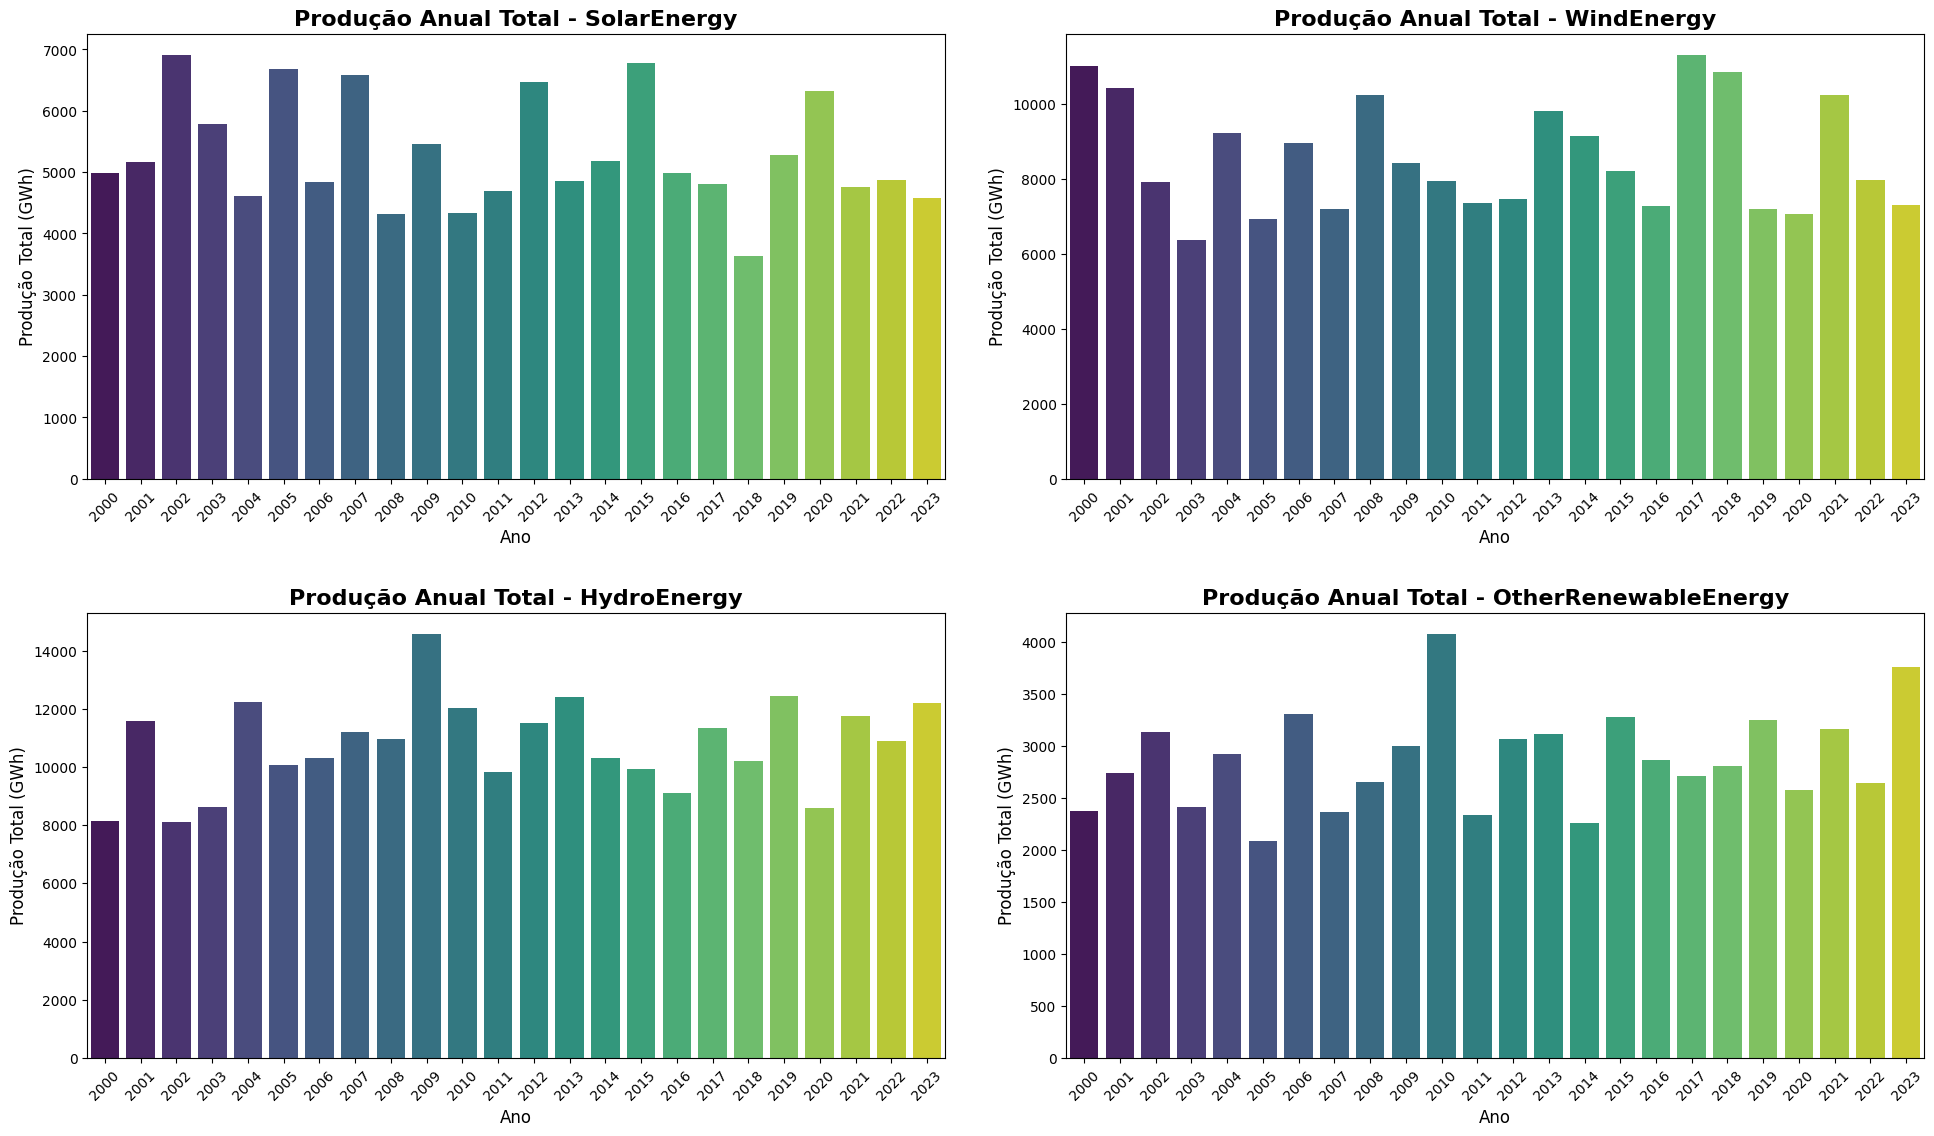

In [23]:
# 1. Agrupar os dados por ano e somar a produção de cada fonte
# Isso cria um DataFrame onde cada linha é um ano e cada coluna é a produção total daquela fonte
df_yearly_total = df.groupby('Year')[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']].sum()

# Lista das fontes de energia para iterar
energy_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']

# 2. Criar a grade de gráficos (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Achatar o array de eixos para facilitar o loop
axes = axes.flatten()

# 3. Loop para criar um gráfico de barras para cada fonte de energia
for i, source in enumerate(energy_sources):
    ax = axes[i] # Seleciona o subplot atual

    # Criar o gráfico de barras no subplot selecionado
    sns.barplot(
        x=df_yearly_total.index,
        y=df_yearly_total[source],
        ax=ax,
        palette='viridis'
    )

    # Personalizar cada gráfico
    ax.set_title(f'Produção Anual Total - {source}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Produção Total (GWh)', fontsize=12)
    ax.set_xlabel('Ano', fontsize=12)

    # Rotacionar os rótulos do eixo X para evitar sobreposição
    ax.tick_params(axis='x', rotation=45)

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout(pad=3.0)

# Exibir a grade de gráficos
plt.show()


Para confirmar a hipótese levantada com o gráfico anterior, da Taxa de Crescimento Anual Composta, foi criado um gráfico de barras que traz a geração acumulada de todos os países para cada fonte por ano. Assim, fica visualmente claro que, de fato, não obtivemos um crescimento significativo de produção. Apesar de picos durante o período, as fontes tiveram um valor agregado que flutuou e acabou voltando para próximo do inicial.

Somando os dois gráficos e o valor do índice, descobrimos que a energia hidrelétrica teve um aumento gradual de aproximadamente 1,8% ao ano. Outras fontes não especificadas tiveram um crescimento de 2,01% ao ano. Já a energia solar e eólica, reduziram a geração em 0,37% e 1,78%, respectivamente.

## Matriz de Correlação

A matriz de correlação nos ajuda a compreender a relação entre múltiplas variáveis.

Matriz de Correlação (Tabela):
                      SolarEnergy  WindEnergy  HydroEnergy  \
SolarEnergy              1.000000   -0.046603    -0.063792   
WindEnergy              -0.046603    1.000000     0.047107   
HydroEnergy             -0.063792    0.047107     1.000000   
OtherRenewableEnergy    -0.041514    0.011408     0.104650   
TotalRenewableEnergy     0.311422    0.557309     0.739133   
DiversificationIndex    -0.221558    0.367999     0.821843   

                      OtherRenewableEnergy  TotalRenewableEnergy  \
SolarEnergy                      -0.041514              0.311422   
WindEnergy                        0.011408              0.557309   
HydroEnergy                       0.104650              0.739133   
OtherRenewableEnergy              1.000000              0.250032   
TotalRenewableEnergy              0.250032              1.000000   
DiversificationIndex             -0.099093              0.684912   

                      DiversificationIndex  
SolarEnergy 

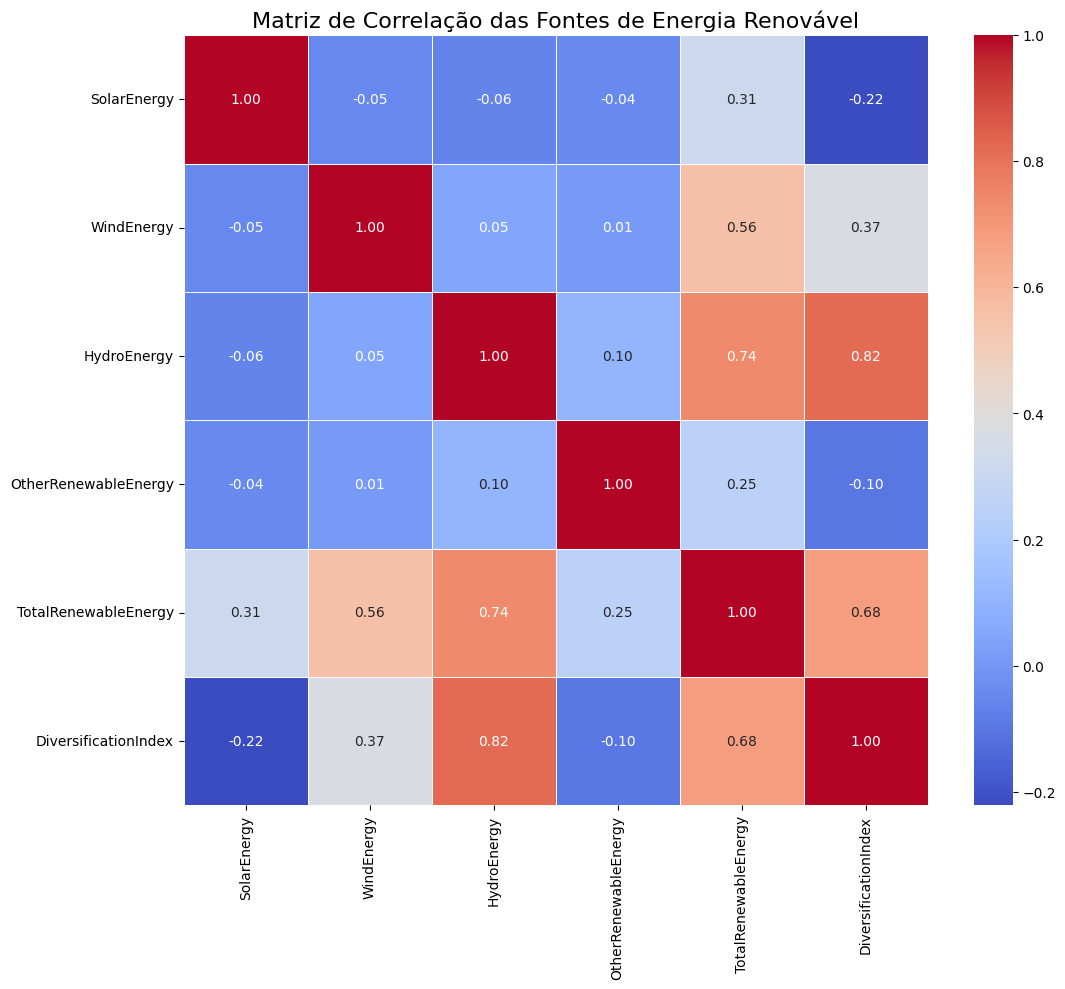

In [ ]:
# selecionar apenas as colunas numéricas para o cálculo
numeric_df = df.select_dtypes(include='number')
# remoção do ano e o país para focar nas relações entre as fontes de energia
if 'Year' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Year'])
if 'Country' in numeric_df.columns: # Embora não seja numérico, é uma boa prática
    numeric_df = numeric_df.drop(columns=['Country'])


# cálculo da Matriz de Correlação
correlation_matrix = numeric_df.corr()

# exibir a matriz como uma tabela
print("Matriz de Correlação (Tabela):")
print(correlation_matrix)
print("\n" + "="*50 + "\n")


# visualizar a Matriz como um Heatmap
print("Visualização da Matriz de Correlação (Heatmap):")
plt.figure(figsize=(12, 10))

# uso do heatmap do seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Matriz de Correlação das Fontes de Energia Renovável', fontsize=16)
plt.show()

A matriz de correlação evidencia que a fonte mais fortemente relacionada à produção total de energia renovável é a hidroelétrica (HydroEnergy), com um coeficiente de 0.74, indicando sua dominância na matriz energética dos países analisados. A energia eólica (WindEnergy) também apresenta uma correlação moderada positiva com o total (0.56), sugerindo seu papel relevante e em crescimento. Por outro lado, energia solar (0.31) e outras fontes renováveis (0.25) demonstram correlações mais fracas, o que pode indicar menor participação relativa ou distribuição desigual entre os países. As correlações baixas ou negativas entre as fontes individuais sugerem que, em geral, os países tendem a investir mais fortemente em uma ou duas fontes predominantes, ao invés de adotar uma diversificação energética ampla. Esse cenário abre espaço para investigações sobre a viabilidade e os desafios da diversificação das matrizes energéticas renováveis ao redor do mundo.

## Tratamento de Valores Nulos e Identificação de Outliers

O dataset escolhido original não possui valores nulos ou outliers. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
from scipy.stats import zscore
# procurando por outliers em cada variável
z_scores = np.abs(zscore(df[variaveis_numericas]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers por variável:")
print(outliers)

# verificação da presença de valores nulos no dataset original
print("Valores nulos no dataset por atributo:")
df.isnull().sum()

Outliers por variável:
[0 0 0 0 0]
Valores nulos no dataset por atributo:


,0
Year,0
Country,0
SolarEnergy,0
WindEnergy,0
HydroEnergy,0
OtherRenewableEnergy,0
TotalRenewableEnergy,0
DiversificationIndex,0


Como já era esperado, nosso dataset não possui nenhum valor nulo.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Country'])

print("\nDataFrame após One-Hot Encoding:")
# exibindo algumas das novas colunas para ver o resultado
print(df_encoded[['Year', 'TotalRenewableEnergy', 'Country_Brazil', 'Country_China', 'Country_USA']].head())


DataFrame após One-Hot Encoding:
   Year  TotalRenewableEnergy  Country_Brazil  Country_China  Country_USA
0  2000           3736.800724           False          False         True
1  2001           1481.731059           False          False         True
2  2002           2582.950935           False          False         True
3  2003           2066.873694           False          False         True
4  2004           2471.361025           False          False         True


Para variáveis categóricas onde não existe uma ordem natural (chamadas de variáveis nominais), a melhor abordagem é o One-Hot Encoding.

## Etapa de Treino e Teste

In [ ]:
# separação de features (X) e target (y) para etapa de treino e teste
features_relevantes = ['Year', 'DiversificationIndex'] + [col for col in df_encoded.columns if 'Country_' in col]

X = df_encoded[features_relevantes]
y = df_encoded['TotalRenewableEnergy']

In [ ]:
# divisão temporal
X_train = X[df_encoded['Year'] < 2020]
X_test = X[df_encoded['Year'] >= 2020]
y_train = y[df_encoded['Year'] < 2020]
y_test = y[df_encoded['Year'] >= 2020]

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (200, 12)
Dimensões de X_test: (40, 12)
Dimensões de y_train: (200,)
Dimensões de y_test: (40,)


## Normalização ou Padronização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelagem

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Avaliação

In [ ]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.5078541010744559
MAE: 405.2394615457096
RMSE: 488.46005328779864


## Gráfico de comparação: Previsões vs Valores reais

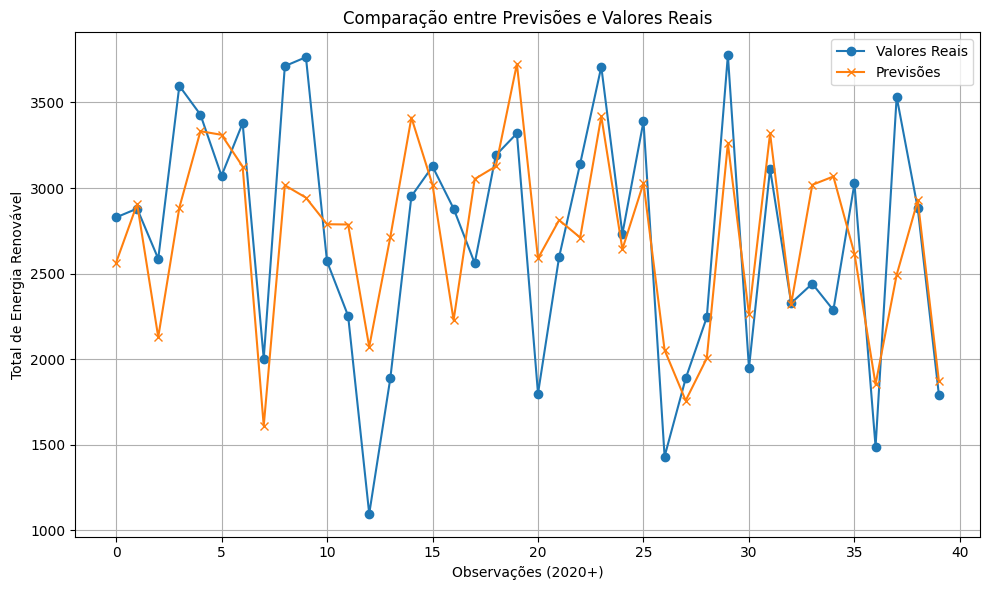

O modelo apresentou um erro médio absoluto de aproximadamente 405.24 unidades de energia renovável.
O modelo explica parcialmente a variabilidade do total de energia renovável, mas ajustes adicionais podem melhorar os resultados.


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Previsões', marker='x')
plt.title('Comparação entre Previsões e Valores Reais')
plt.xlabel('Observações (2020+)')
plt.ylabel('Total de Energia Renovável')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

erro_absoluto_medio = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"O modelo apresentou um erro médio absoluto de aproximadamente {erro_absoluto_medio:.2f} unidades de energia renovável.")
if r2 > 0.6:
    print("A performance é razoável para um modelo simples e com poucos atributos. Há espaço para melhorias com modelos mais sofisticados.")
elif r2 < 0.3:
    print("O R² indica que o modelo tem baixa capacidade preditiva. Isso pode sugerir que outras variáveis importantes estão faltando.")
else:
    print("O modelo explica parcialmente a variabilidade do total de energia renovável, mas ajustes adicionais podem melhorar os resultados.")

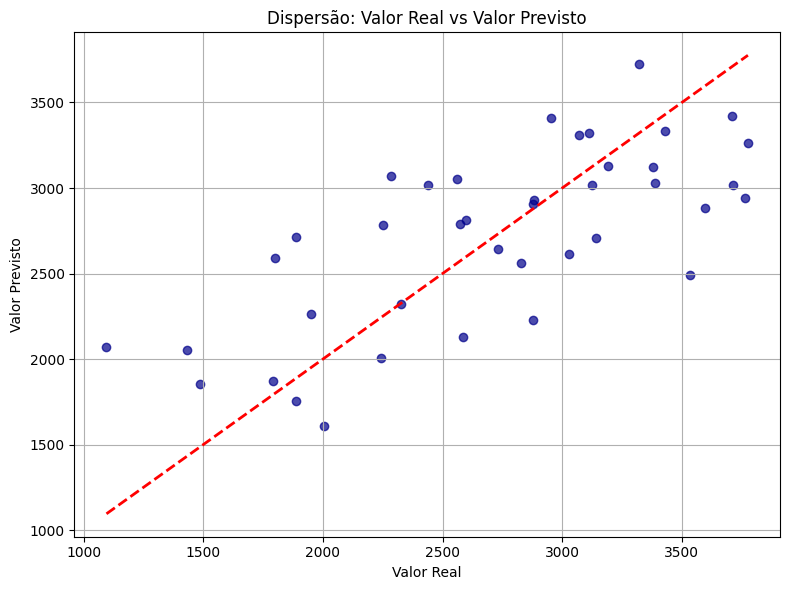

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Dispersão: Valor Real vs Valor Previsto')
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico de valores reais versus previstos mostra que o modelo conseguiu, em geral, seguir a tendência dos dados, acertando os padrões de crescimento ou queda em vários momentos. No entanto, há algumas diferenças entre os valores previstos e os reais, o que indica que o modelo ainda comete erros. Mesmo assim, ele consegue fazer previsões razoáveis e acompanhar parte do comportamento da energia renovável ao longo do tempo.



# Conclusão

A análise mostra que a hidroenergia ainda é a principal responsável pelo volume de produção renovável, com forte correlação com o total produzido (r ≈ 0,74). A energia eólica vem em segundo lugar em impacto (r ≈ 0,56), seguida pela solar. O índice de diversificação aponta que alguns países avançaram na combinação equilibrada de fontes renováveis, enquanto outros mantêm grande dependência de uma única fonte (geralmente a hidrelétrica).

Sobre as hipóteses:

1.   A primeira hipótese foi refutada. Com o cálculo de geração de energia por fonte, das 3 fontes especificadas, apenas a hidrelétrica teve crescimento anual positivo.

2.   Com Brasil e China tendo os dois menores desvios padrão no Índice de Diversificação da matriz, isso acaba caindo por Terra uma vez que o Brasil não é um país desenvolvido. Apesar disso, vale ressaltar que temos a matriz energética mais limpa do mundo, podendo assim ser um país "outlier" nesse quesito devido a questões geográficas e climáticas. De qualquer forma, temos países desenvolvidos liderando o Índice com os maiores desvios padrão, desbancando a hipótese.

3.   Embora simples, o modelo conseguiu capturar a tendência geral, mesmo tendo espaço para erros. Portanto, é sim possível prever as tendências de evolução e diversificação das fontes de energia renovável até 2030.